## Optimizing Manufacturing Processes in Mechanical Engineering

### Model

To optimize drug delivery, mathematical models can be used to maximize drug concentration at the target site while minimizing side effects. 

#### Objective:

The objective of optimizing drug delivery systems is to maximize drug concentration at the target site while minimizing side effects. This can be achieved by carefully selecting the drug dosage, delivery method, release profile, and targeted site

The objective function can be defined as:

 $$\text{Maximize } \alpha \cdot \text{DrugConcentration} - \beta \cdot \text{SideEffects} $$

Here, \($\alpha$\) and \($\beta$\) are weighting factors that determine the relative importance of drug concentration and side effects in the optimization $[2]$.

#### Decision Variables:
To optimize drug delivery systems, several decision variables need to be considered:
1. **Drug Dosage (D)**: This is a continuous variable representing the amount of drug administered.
2. **Delivery Method (M)**: This is a categorical variable denoting the chosen delivery method, such as oral, intravenous, or transdermal.
3. **Release Profile (R)**: This is a categorical variable representing the selected release profile, such as zero-order, first-order, or controlled release.
4. **Targeted Site (T)**: This is a categorical variable indicating the specific site or tissue where the drug is intended to act $[1]$.

#### Constraints:
To ensure the safety and effectiveness of drug delivery systems, several constraints need to be considered:
1. **Drug Dosage Limitation**: There are limits on the drug dosage to prevent overdosing or underdosing. These limits can be represented as \($D_{\min} \leq D \leq D_{\max}$\).
2. **Time Constraints**: There may be a maximum allowable drug release time \(($t_{\text{release}} \leq T_{\max})$\) to ensure timely and controlled drug delivery.
3. **Patient-Specific Characteristics**: Patient-specific characteristics, such as age, weight, or medical conditions, can influence the drug dosage and delivery method. These characteristics can be incorporated into the constraints as a function of patient-specific parameters \($f(P) \leq C$\).
4. **Safety Limits**: Safety limits need to be defined to ensure that the drug dosage, delivery method, release profile, and targeted site do not exceed acceptable safety thresholds. These limits can be represented as a function \($g(D, M, R, T) \leq S$\) $[1]$.

#### Dynamic Equation of Drug:
This model may incorporate equations describing drug diffusion, release kinetics, and interactions with the target site. The specific formulation of the model will depend on the characteristics of the drug, the delivery method, and the targeted site $[2]$.

Let's explore the mathematical model and numerical methods used in drug diffusion equations. We will consider a one-dimensional case where the drug is released from a dosage form and diffuses through a homogeneous medium to reach the target site. The concentration of the drug at a given location \($x$\) and time \($t$\) is denoted as \($C(x, t)$\). The drug diffusion can be described by Fick's second law of diffusion:
$$ \frac{\partial C(x, t)}{\partial t} = D \cdot \frac{\partial^2 C(x, t)}{\partial x^2} $$
where \($D$\) is the diffusion coefficient of the drug in the medium.

To model the drug release from the dosage form, we can use a release rate equation. Let's assume a first-order release:
$$ \frac{dC(x=0, t)}{dt} = k \cdot C(x=0, t) $$
where \($k$\) is the release rate constant.

To consider the interaction of the drug with the target site, we can assume a linear adsorption process. The rate of drug adsorption is proportional to the concentration at the target site \($C(x=T, t)$\):
$$\frac{dC(x=T, t)}{dt} = k_{\text{ads}} \cdot (C(x=T, t) - C_{\text{target}}) $$
where \($k_{\text{ads}}$\) is the adsorption rate constant, and \($C_{\text{target}}$\) is the desired concentration at the target site.


In [ ]:
# Import of the necessaries libraries

from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

In [4]:

# Pharmacokinetic parameters (hypothetical values)
k_dissolution = 0.1  # Dissolution rate in the stomach
k_absorption = 0.05  # Absorption rate in the blood
k_elimination = 0.01 # Elimination rate from the body

# Weights for efficacy and side effects in the objective function
alpha = 1.0  # Weight for efficacy
beta = 0.5   # Weight for side effects

# Pharmacokinetic model
def pharmacokinetic_model(t, y, k_dissolution, k_absorption, k_elimination):
    Q_stomach, Q_blood = y
    dQ_stomach_dt = -k_dissolution * Q_stomach
    dQ_blood_dt = k_absorption * Q_stomach - k_elimination * Q_blood
    return [dQ_stomach_dt, dQ_blood_dt]

# Efficacy and side effects functions
def efficacy(C):
    return C / (50 + C)  # Simplified form

def side_effects(C):
    return C**2 / (100**2 + C**2)  # Simplified form

# Objective function for optimization
def objective_function(dose_params, k_dissolution, k_absorption, k_elimination):
    dose = dose_params[0]
    sol = solve_ivp(pharmacokinetic_model, [0, 48], [dose, 0], 
                    args=(k_dissolution, k_absorption, k_elimination), t_eval=np.linspace(0, 48, 200))
    C_blood = sol.y[1]
    total_efficacy = np.trapz([efficacy(C) for C in C_blood], sol.t)
    total_side_effects = np.trapz([side_effects(C) for C in C_blood], sol.t)
    return -(alpha * total_efficacy - beta * total_side_effects)

Optimal dosage of paracetamol: 259.40 mg


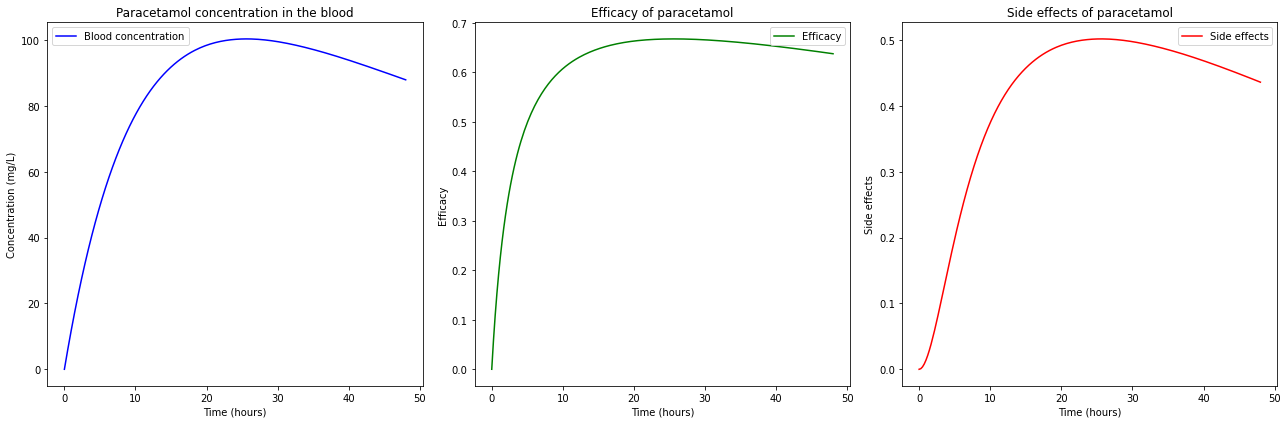

In [5]:

# Parameters for optimization
initial_dose = 500  # mg
maximum_dose = 1000  # mg

# Optimization to find the optimal dose
result = minimize(objective_function, [initial_dose], args=(k_dissolution, k_absorption, k_elimination),
                  bounds=[(0, maximum_dose)])

# Displaying the result
if result.success:
    optimal_dosage = result.x[0]
    print(f"Optimal dosage of paracetamol: {optimal_dosage:.2f} mg")
else:
    print("Optimization failed.")

# Simulation with the optimal dosage
if result.success:
    sol = solve_ivp(pharmacokinetic_model, [0, 48], [optimal_dosage, 0], 
                    args=(k_dissolution, k_absorption, k_elimination), t_eval=np.linspace(0, 48, 200))

    # Calculating efficacy and side effects at each time point
    efficacy_values = [efficacy(C) for C in sol.y[1]]
    side_effects_values = [side_effects(C) for C in sol.y[1]]

    # Visualizing the results
    plt.figure(figsize=(18, 6))

    # Blood concentration
    plt.subplot(1, 3, 1)
    plt.plot(sol.t, sol.y[1], label='Blood concentration', color='blue')
    plt.xlabel('Time (hours)')
    plt.ylabel('Concentration (mg/L)')
    plt.title('Paracetamol concentration in the blood')
    plt.legend()

    # Efficacy
    plt.subplot(1, 3, 2)
    plt.plot(sol.t, efficacy_values, label='Efficacy', color='green')
    plt.xlabel('Time (hours)')
    plt.ylabel('Efficacy')
    plt.title('Efficacy of paracetamol')
    plt.legend()

    # Side effects
    plt.subplot(1, 3, 3)
    plt.plot(sol.t, side_effects_values, label='Side effects', color='red')
    plt.xlabel('Time (hours)')
    plt.ylabel('Side effects')
    plt.title('Side effects of paracetamol')
    plt.legend()

    plt.tight_layout()
    plt.show()


#### Conclusion : 

The objective was to find the appropriate drug dosage to administer while aiming to
minimize the time it takes for the drug to become effective. By simulating the
pharmacokinetic model and analyzing the blood concentration of paracetamol over
time, the code provides insights into the relationship between dosage, effectiveness,
and time.
After our analysis, it comes out that the optimal dosage of paracetamol is 259.09 mg,
under an initial dose of 500 mg and a maximum dose of 1000 mg.

### References

1. Artificial Intelligence's Impact on Drug Discovery and ... - NCBI 
2. Optimizing drug delivery systems using systematic "design of experiments." Part I: fundamental aspects – PubMed
